In [1]:
# This is only valid when the package is not installed
import sys
sys.path.append('../../') # two folders up

In [2]:
import DeepINN as dp

Using default backend: PyTorch
Using Pytorch:  2.0.1+cu117


In [3]:
# Let us make a simple rectangle
X = dp.spaces.R2('x') #  2D space stencil
R = dp.domains.Parallelogram(X, [0,0], [1,0], [0,1])

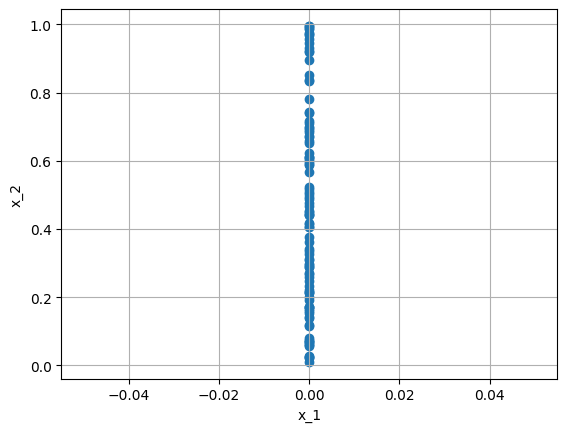

In [4]:
# Sample points
collocation_points = dp.samplers.RandomUniformSampler(R, n_points = 50)
left_boundary = dp.samplers.RandomUniformSampler(R.boundary, n_points = 100, filter_fn=lambda x: x[:,0]==0.0)
dp.utils.scatter(X, left_boundary)

In [5]:
bc_points = dp.constraint.DirichletBC(R, "random", 100)
bc_points_right = dp.constraint.DirichletBC(R, "random", 100, lambda x: x[:,0]==1.0)

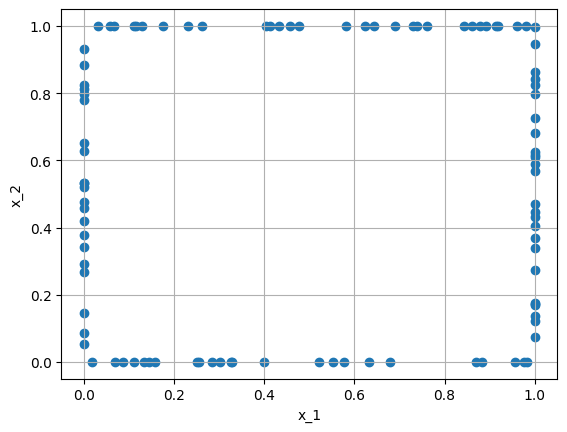

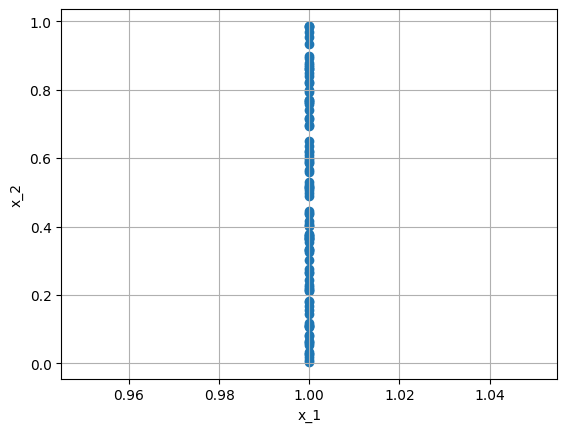

In [6]:
dp.utils.scatter(X, bc_points.sample_points())
dp.utils.scatter(X, bc_points_right.sample_points())

In [7]:
base = dp.nn.FullyConnected()
base.forward()